# Exercise 2: Data Types, Distance Functions, Feature Extraction

## Exercise 2-4: KDD Process (Solution)

In this tutorial we want to gain an insight into the big picture of knowledge discovery and mining tasks. Therefore, we will have practical introduction and discuss the KDD process upon this task.

In general, the steps of the KDD process are 
1. Data Cleaning and Integration
2. Transformation, Selection, Projection
3. Data Mining
4. Evaluation and Visualization

Here, we focus on different aspects of these steps. In doing so, we will get to know useful python packages and functions.

#### Load dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Exploration

#### Load dataset

The dataset we are using (`housing.csv`) is from a Kaggle competition called "California Housing Prices - Median house prices for California districts derived from the 1990 census" (Link to source: https://www.kaggle.com/camnugent/california-housing-prices)
This data has contains features like population, median income, median housing price, ... for each block group (typically one block has a population of 600 to 3000 people in CA). 

Load the dataset into a `pandas.DataFrame`.

In [1]:
# cal_housing = pd.read_csv('housing.csv')

Let's look at the data more closely. First, we will print some samples of the dataset:

In [3]:
cal_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


We can also have a more general overview of the dataset by having a look at the statistics of the data.

In [4]:
cal_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In terms of preprocessing step (1st step in the KDD pipeline), it is also crucial to know about the datatypes and formats of the dataset.

In [5]:
cal_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Another way to get a feel of the <b>numerical attributes</b> is to plot them in histograms.

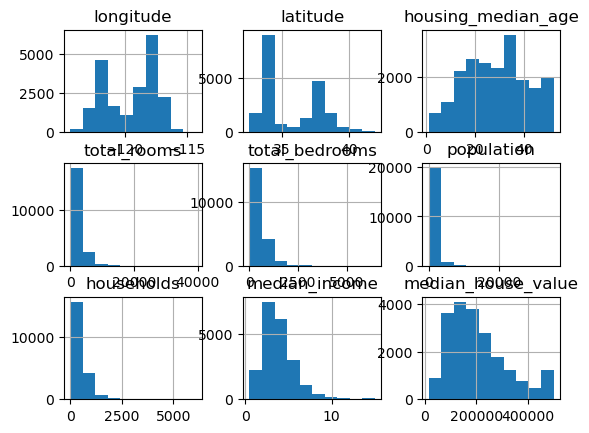

In [6]:
cal_housing.hist()
plt.show()

Explore the <b>non-numerical</b> attribute.

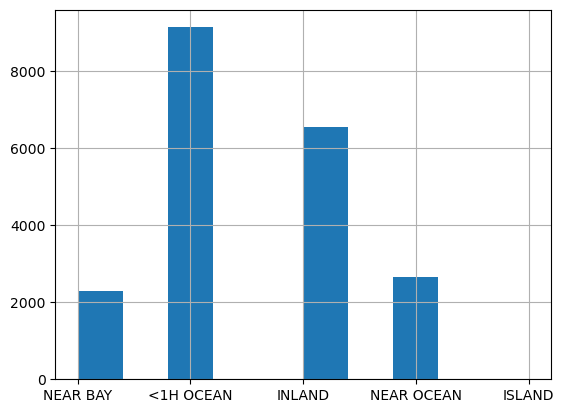

In [7]:
cal_housing['ocean_proximity'].hist()
plt.show()

Or in a more textual form:

In [8]:
{key:value for key,value in zip(*np.unique(cal_housing['ocean_proximity'], return_counts=True))}

{'<1H OCEAN': 9136,
 'INLAND': 6551,
 'ISLAND': 5,
 'NEAR BAY': 2290,
 'NEAR OCEAN': 2658}

#### Correlations in the dataset

Create a scatter plot matrix.

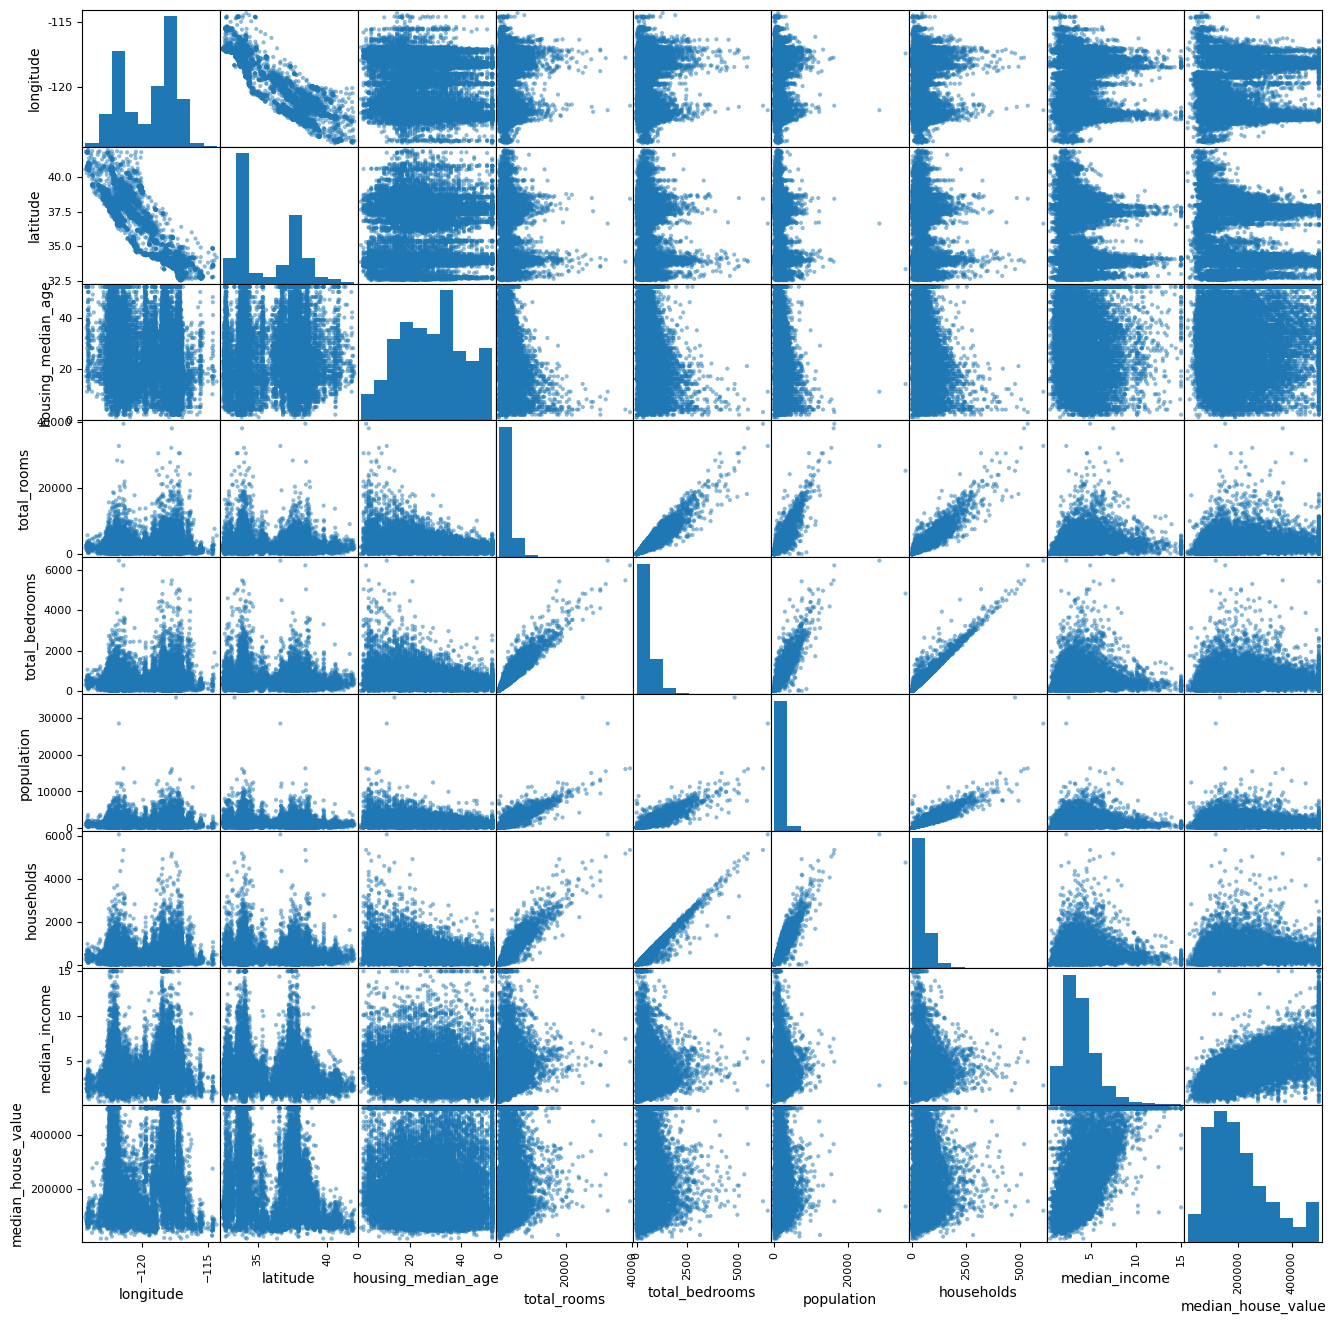

In [9]:
pd.plotting.scatter_matrix(cal_housing, figsize=(16,16))
plt.show()

## Preprocessing

#### Data cleaning
Let's search for missing/corrupted entries in the data

In [10]:
nas = cal_housing.isna()
nas.sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Option 1: Delete the corresponding entries

In [11]:
cal_housing = cal_housing.dropna(axis=0)

Option 2: Drop the whole feature

In [12]:
#cal_housing = cal_housing.dropna(axis=1)

Option 3: Introduce new values for the missing entries (zero, mean, median etc...). Has to be done with caution. Omitted here.

#### Create one-hot encoding for categorical attributes

Before that, we replace the category 'ISLAND' by 'NEAR OCEAN' as we can hardly learn anything from 5 samples.

In [13]:
cal_housing['ocean_proximity'] = cal_housing['ocean_proximity'].replace('ISLAND', 'NEAR OCEAN')

In [14]:
one_hot = pd.get_dummies(cal_housing['ocean_proximity'])
one_hot

,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
20635,0,1,0,0
20636,0,1,0,0
20637,0,1,0,0
20638,0,1,0,0


In [15]:
cal_housing = pd.concat([cal_housing.drop('ocean_proximity', axis=1), one_hot], axis=1)
cal_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0


How could we encode the oceaen proximity feature alternatively?

We could consider it as an ordinal feature with 

[`INLAND`=0]
 <  
[`<1H OCEAN`=1]
 <  
[`NEAR BAY`=2]
 <  
[`NEAR OCEAN`=`ISLAND`=3]. 

#### Train-test Split
Divide the Data into a Train and a Test set.

In [16]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(cal_housing, test_size=0.2, random_state=0)

Separate the target (median house value) from the covariates, i.e. create X_train, y_train, X_test, and y_test.

In [17]:
X_train = train_set.drop('median_house_value', axis=1)
X_test = test_set.drop('median_house_value', axis=1)
y_train = train_set['median_house_value']
y_test = test_set['median_house_value']

#### Feature Scaling

Machine Learning algorithms perform best when the input numerical attributes have similar scales. Let's examing sklearn's StandardScaler to perform feature scaling on those numerical features.

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = X_train.values # to numpy
X_test = X_test.values # to numpy
X_train[:,:-4] = scaler.fit_transform(X_train[:,:-4]) # exclude the one-hot features
X_test[:,:-4] = scaler.transform(X_test[:,:-4]) # exclude the one-hot features

## Select and Train a Model

Choose one or more models from sklearn and train them.

Here we will train a linear regression model (note: this choice makes the previous feature scaling unnecessary)

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

## Evaluation

Calculate the R² score for the train and test set.

In [20]:
from sklearn.metrics import r2_score

train_score = r2_score(y_train, model.predict(X_train))
test_score = r2_score(y_test, model.predict(X_test))

train_score, test_score

(0.6442532623687187, 0.6526060502655654)

## Visualization

For this part, use an ordinary linear regression model trained with the data above.

Plot the latitudes and longitudes of the houses in the dataset. Color the points according to the predicted house value. What can you see?

Hint: Use `np.argsort()` to plot the house in ascending value-order (clearer result). 

In [21]:
X_complete = np.concatenate([X_train, X_test], axis=0)
pred_complete = model.predict(X_complete)

In [22]:
order = np.argsort(pred_complete)

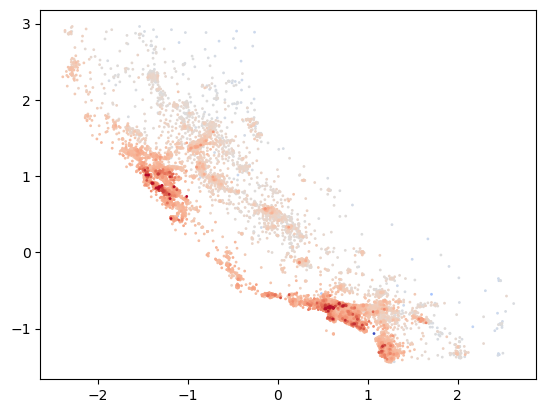

In [23]:
plt.scatter(X_complete[order,0], X_complete[order,1], c=pred_complete[order], cmap='coolwarm', alpha=1., s=1)
plt.show()

1. We can see a rough outline of the state of california (not very surprising).
2. Coastal regions seem to have more expensive houses.
3. We can also clearly see that the regions around San Francisco and Los Angeles have the highest house values.

It looks like the predictions are not linear w.r.t. latitude and longitude. How can this be explained?

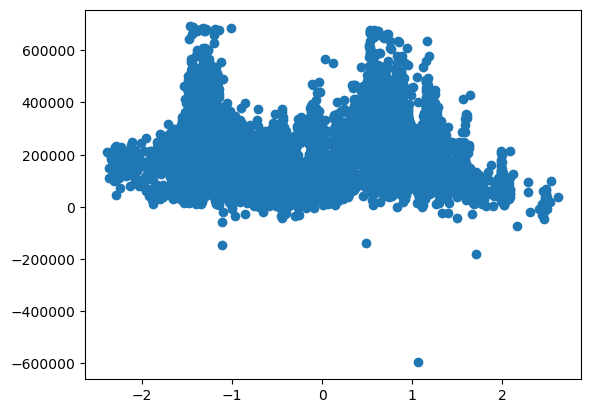

In [24]:
plt.scatter(X_complete[order,0],pred_complete[order])
plt.show()

The reason for that is that the other covariates are not fixed in these plots. Only if we keep them constant, we can expect linearly changing predictions.

### Model Inspection

Examine the model and identify important features.

In [25]:
feature_names = list(train_set.columns)
feature_names.remove('median_house_value')
{feature:coef for feature, coef in zip(feature_names, model.coef_)}

{'longitude': -55832.81156730262,
 'latitude': -56282.93091664778,
 'housing_median_age': 13763.448496281791,
 'total_rooms': -13002.70324913761,
 'total_bedrooms': 42964.301285362286,
 'population': -40826.23955427717,
 'households': 15720.465404826029,
 'median_income': 74315.64275554992,
 '<1H OCEAN': 9688.353127480692,
 'INLAND': -28468.372633384824,
 'NEAR BAY': 5711.628241209887,
 'NEAR OCEAN': 13068.391264694297}

As we scaled all features to the same scale, the absolute values of the coefficients can be seen as indicators for the feature importance.

The median income seems to be the strongest predictor.

Interestingly, longitude and latitude also have a rather strong impact. How would you explain that? Justify your hypothesis with an appropriate experiment.

We exclude longitude and latitude from the features and train the same model again.

In [26]:
model = LinearRegression()

model.fit(X_train[:,2:], y_train)

LinearRegression()

In [27]:
train_score = r2_score(y_train, model.predict(X_train[:,2:]))
test_score = r2_score(y_test, model.predict(X_test[:,2:]))

train_score, test_score

(0.6313447241585552, 0.6441061905410387)

In [28]:
{feature:coef for feature, coef in zip(feature_names[2:], model.coef_)}

{'housing_median_age': 15270.645407692438,
 'total_rooms': -15801.183569921597,
 'total_bedrooms': 33669.02815290556,
 'population': -39933.51300803613,
 'households': 27493.5485845071,
 'median_income': 76571.27752505054,
 '<1H OCEAN': 12451.872356634462,
 'INLAND': -55227.40299622702,
 'NEAR BAY': 17543.2702491398,
 'NEAR OCEAN': 25232.260390452742}

Apparently, the performance does hardly decrease. On the other hand, the coefficients for the ocean proximity features grow in absolute values while the other features coefficients remain largely the same. That is, the south-west component in latitude and longitude is used by the model as an in indicator for the ocean proximity.